# Assignment 20 : Forecasting Exchange Rates Using Time Series Analysis

## objective :

Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset.

## Task 1: Data Preparation and Exploration

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [68]:
# loads the dataset
data = pd.read_csv("exchange_rate.csv")

,Ex_rate
date,
1990-01-01,0.7855
1990-02-01,0.7818
1990-03-01,0.7867
1990-04-01,0.7860
1990-05-01,0.7849


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [17]:
data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [18]:
data.isna().sum().sum()

0

In [19]:
data.duplicated().sum()

0

In [20]:
# Extract only date from the column
data["date"] = pd.to_datetime(data["date"],format="%d-%m-%Y %H:%M")

In [21]:
data["date_only"] = data["date"].dt.date

In [23]:
data.date

0      1990-01-01
1      1990-01-02
2      1990-01-03
3      1990-01-04
4      1990-01-05
          ...    
7583   2010-10-06
7584   2010-10-07
7585   2010-10-08
7586   2010-10-09
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       7588 non-null   datetime64[ns]
 1   Ex_rate    7588 non-null   float64       
 2   date_only  7588 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 178.0+ KB


In [26]:
updated_df = data[["date","Ex_rate"]]

In [28]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [29]:
updated_df.head()

,date,Ex_rate
0,1990-01-01,0.7855
1,1990-01-02,0.7818
2,1990-01-03,0.7867
3,1990-01-04,0.7860
4,1990-01-05,0.7849


In [30]:
updated_df.columns

Index(['date', 'Ex_rate'], dtype='object')

In [31]:
updated_df.shape

(7588, 2)

In [32]:
updated_df.ndim

2

In [34]:
updated_df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


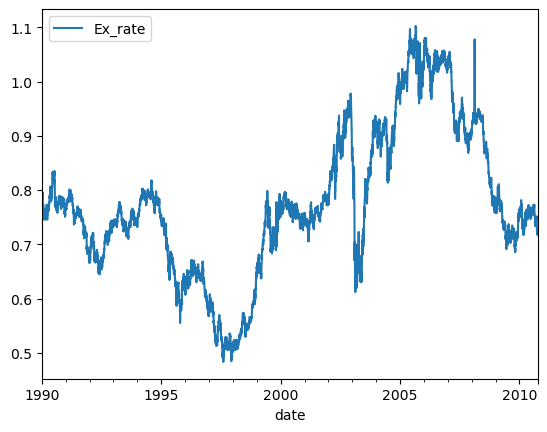

In [37]:
# Ploting the time series

updated_df.plot(x="date",y="Ex_rate",kind="line")
plt.show()

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'Ex_rate'}>]], dtype=object)

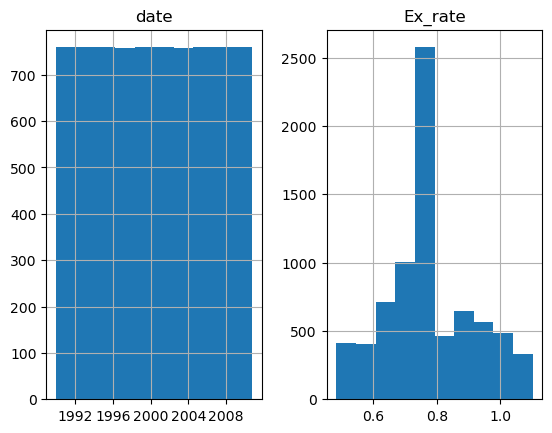

In [38]:
updated_df.hist()

<Axes: xlabel='Ex_rate', ylabel='Density'>

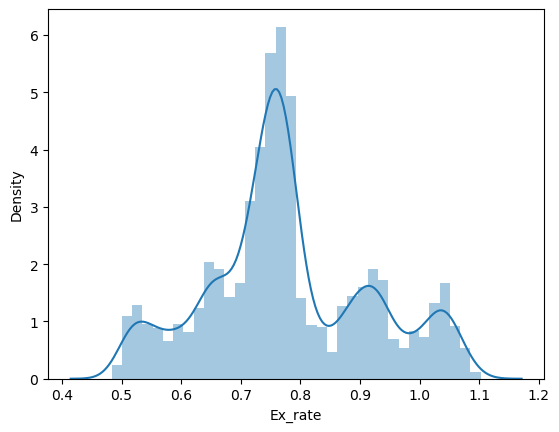

In [43]:
sns.distplot(updated_df.Ex_rate)

<Axes: >

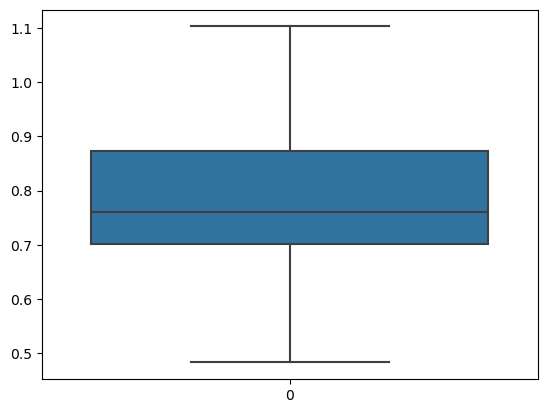

In [44]:
sns.boxplot(updated_df.Ex_rate)

In [55]:
# split the dataset into train and validation
length= len(updated_df)-365
train = updated_df[0:length]

In [53]:
validation = updated_df[length:]

In [56]:
print(len(train))

7223


In [57]:
print(len(validation))

365


## Task 2 : Model Building - ARIMA



In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

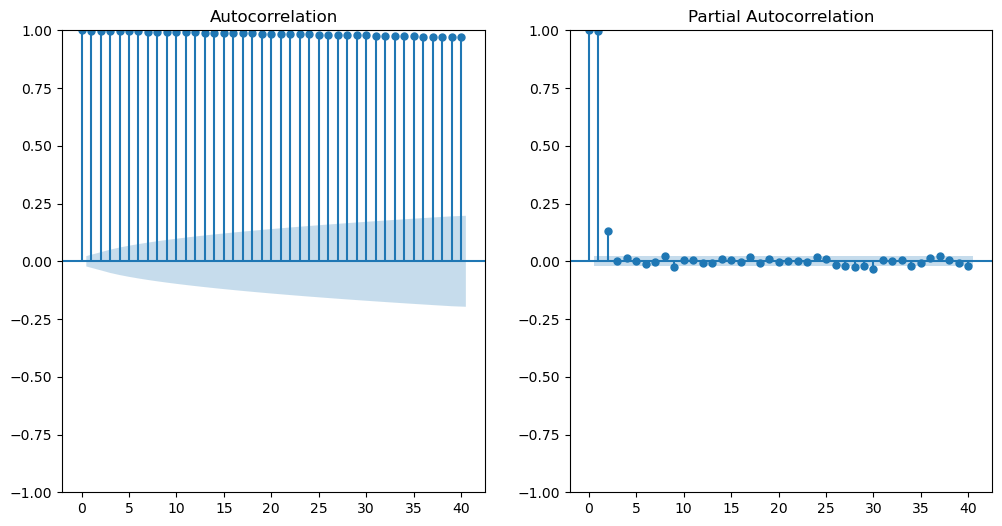

In [72]:

data = pd.read_csv("exchange_rate.csv",parse_dates=["date"],index_col=["date"])
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(data,ax=plt.gca(),lags=40)
plt.subplot(122)
plot_pacf(data,ax=plt.gca(),lags=40)
plt.show()

In [74]:
# Model Fitting

from statsmodels.tsa.arima.model import ARIMA

In [75]:
arima_model = ARIMA(data,order=(1,1,1))

C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venky\anaconda3\Lib\site-

In [76]:
arima_result = arima_model.fit()

In [77]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 31 Aug 2024   AIC                         -56102.322
Time:                        11:16:36   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

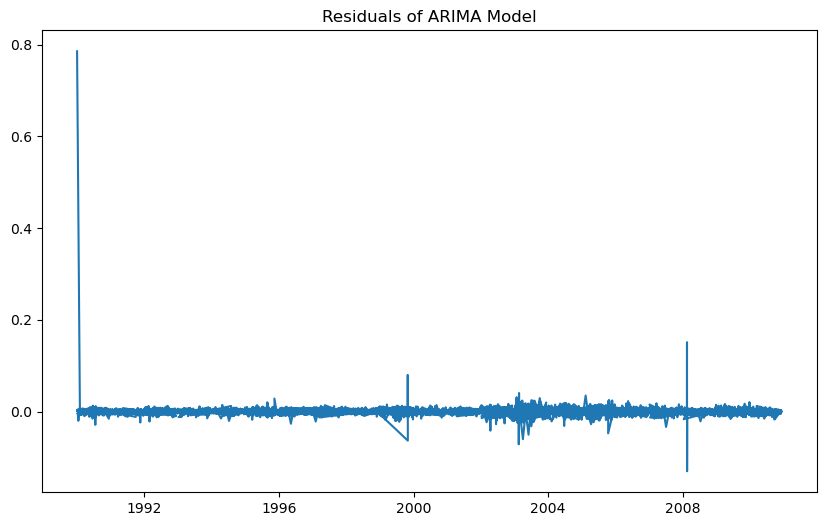

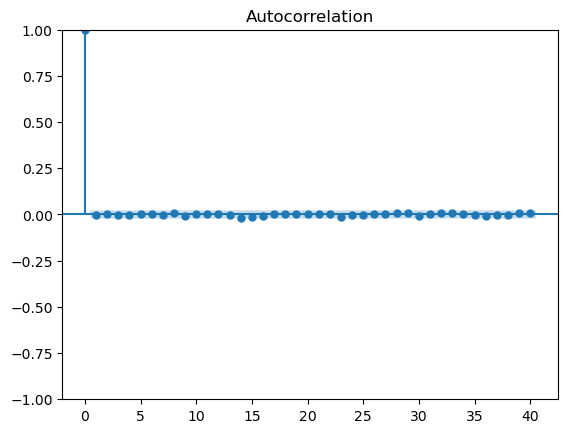

In [78]:
# Plot the residuals
residuals = arima_result.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.show()


C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


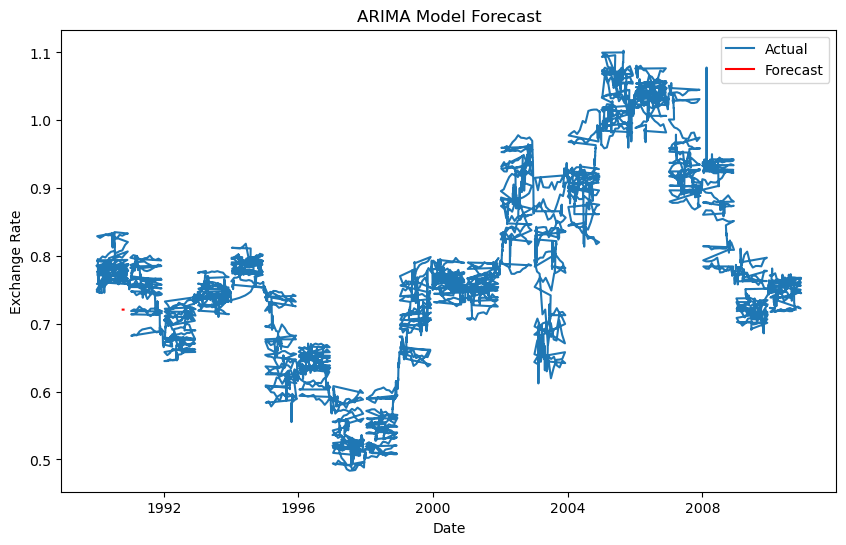

In [80]:
# Forecast future values
forecast = arima_result.forecast(steps=10)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data
         , label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


## Model Building - Exponential Smoothing


In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


exp_model = ExponentialSmoothing(data, trend='add').fit()

# Summary of the model
print(exp_model.summary())


C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77641.009
Trend:                         Additive   BIC                         -77613.272
Seasonal:                          None   AICC                        -77640.998
Seasonal Periods:                  None   Date:                 Sat, 31 Aug 2024
Box-Cox:                          False   Time:                         11:17:32
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8700406                alpha                 True
smoothing_trend             0.0000

C:\Users\venky\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


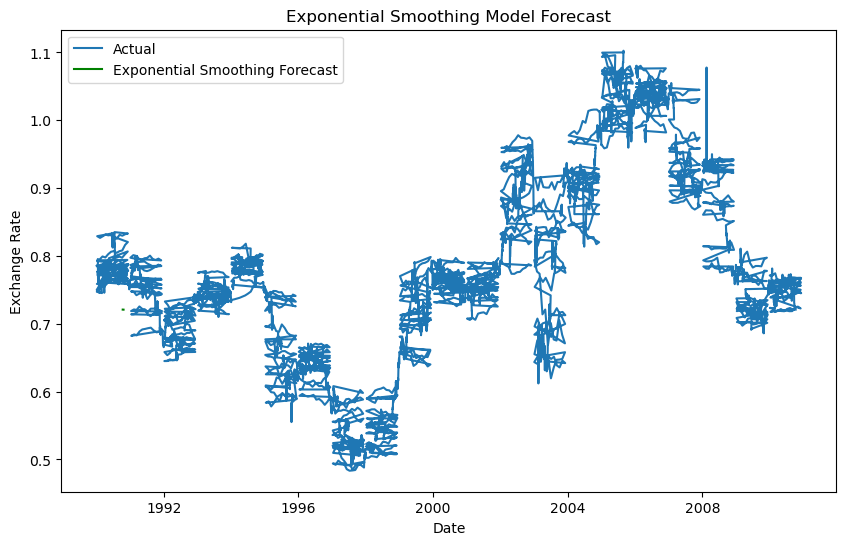

In [84]:
# Forecast future values
exp_forecast = exp_model.forecast(steps=10)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


## Task 4 : Evaluation and Comparison

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate error metrics for ARIMA
arima_mae = mean_absolute_error(data[-10:], forecast)
arima_rmse = mean_squared_error(data[-10:], forecast, squared=False)

# Calculate error metrics for Exponential Smoothing
exp_mae = mean_absolute_error(data[-10:], exp_forecast)
exp_rmse = mean_squared_error(data[-10:], exp_forecast, squared=False)

print(f"ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}")
print(f"Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}")


ARIMA MAE: 0.001556771200434226, RMSE: 0.0018425706107113402
Exponential Smoothing MAE: 0.001574070641361358, RMSE: 0.0018519598744416396
